<a href="https://colab.research.google.com/github/Shaikmd3797/KNN-for-glass-Classification/blob/main/KNN_for_glass_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***KNN algorithm for glass identification dataset***

# **obstract**

Following data cleaning, two Scikit-Learn KNN models should be created
for two different distance metrics: **Square Euclidean and Manhattan
distance**. The performance of the two models using different distance
metrics should be compared in terms of accuracy to the test data and
Scikit-Learn Classification Report.



# **details about dataset:**

You are provided with a dataset from USA Forensic Science Service
which has description of 6 types of glass; defined in terms of their
oxide content (i.e. Na, Fe, K, etc). Your task is to use K-Nearest
Neighbor (KNN) classifier to classify the glasses.
The original dataset is available at
(https://archive.ics.uci.edu/ml/datasets/glass+identification). For
detailed description on the attributes of the dataset,
please refer to the original link of the dataset in the UCI ML
repository.

Attribute Information:

Id number: 1 to 214 (removed from CSV file)

RI: refractive index

Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

Mg: Magnesium

Al: Aluminum

Si: Silicon

K: Potassium

Ca: Calcium

Ba: Barium

Fe: Iron

Type of glass: (class attribute)

In [26]:
pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **1)data cleaning**

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions # used to plot the decision boundary of ml algorithms
from sklearn.model_selection import cross_val_score # import all the functions reqd for cross validation
from sklearn.metrics import roc_auc_score,f1_score,confusion_matrix,accuracy_score
from scipy.spatial import distance

In [28]:
df=pd.read_csv('glass_data.csv', header= None)
df.columns = ['ID', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass']
df=df.drop(0, axis=0)

In [29]:
df=df.drop('ID',axis=1)
df=df.astype(float)
df['Type of glass']=df['Type of glass'].astype(int)

In [30]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 1 to 214
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RI             214 non-null    float64
 1   Na             214 non-null    float64
 2   Mg             214 non-null    float64
 3   Al             214 non-null    float64
 4   Si             214 non-null    float64
 5   K              214 non-null    float64
 6   Ca             214 non-null    float64
 7   Ba             214 non-null    float64
 8   Fe             214 non-null    float64
 9   Type of glass  214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.4 KB


In [32]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [33]:
def data_cleaning(data,target):
  data=data.drop_duplicates()
  data=data.dropna()
  features=[]
  for i in data.columns:
    if i != target:
      features.append(i) 
  for j in features:
    q1=data[j].quantile(0.25)  # 25 th quantile
    q3=data[j].quantile(0.75)  # 75 th quantile
    iqr= q3-q1  #iqr value
    upper= q3+1.5 * iqr
    lower = q1-1.5* iqr
    #data[j]=data[j].clip(lower, upper) # the values are outliers which is out of range
    """ Here the outliers can be decided the classification of glass.So, outliers are not clipping for this data """ 
  return data

In [34]:
df_clean=data_cleaning(df,'Type of glass')

In [35]:
df_clean.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


# **2)EDA and pairplot for features and correlation between features and target**

In [36]:
def EDA(data,feature,target):
  for i in feature:
    sns.displot(data,x=i)
    sns.jointplot(x=i,y=target,data=data,kind='scatter')
  plt.figure(figsize=(20, 10))
  sns.heatmap(data.corr().abs(),  annot=True)
  #sns.pairplot(data,hue=target)

In [37]:
features=[]
for i in df_clean.columns:
  if i != 'Type of glass':
    features.append(i)
features

['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

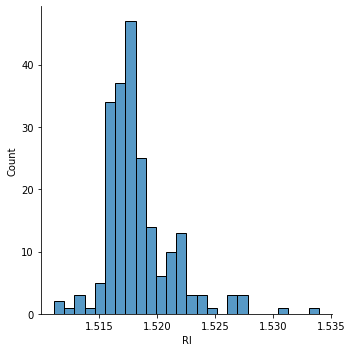

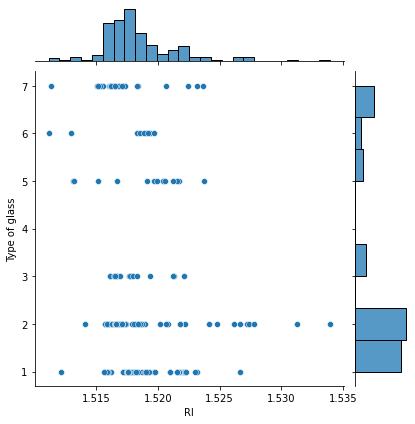

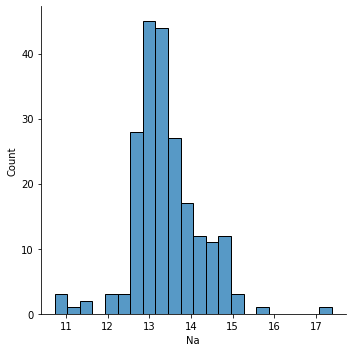

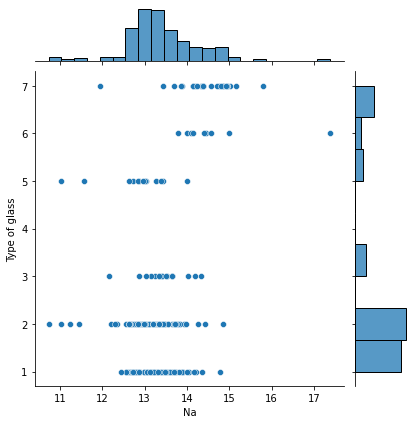

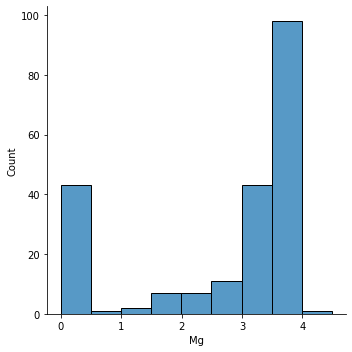

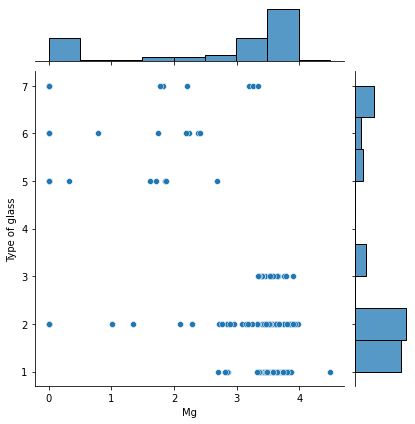

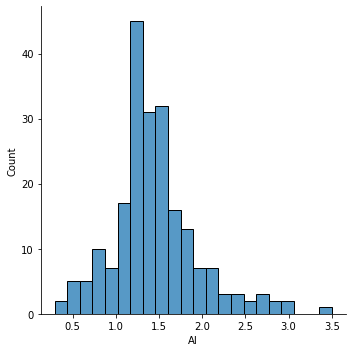

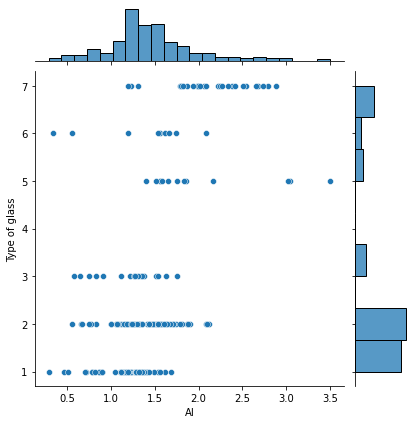

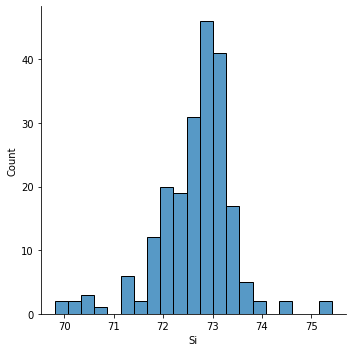

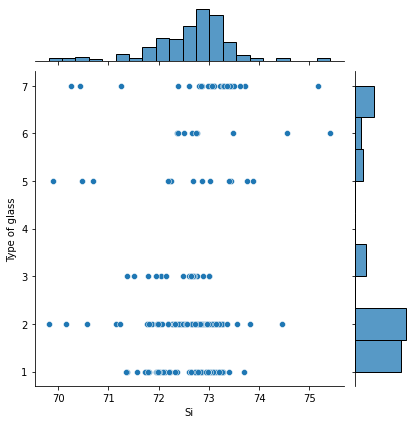

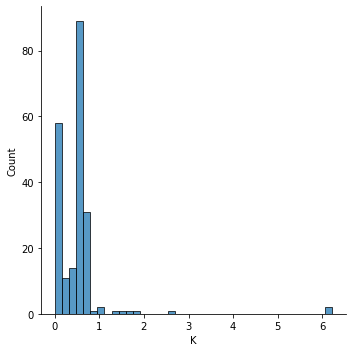

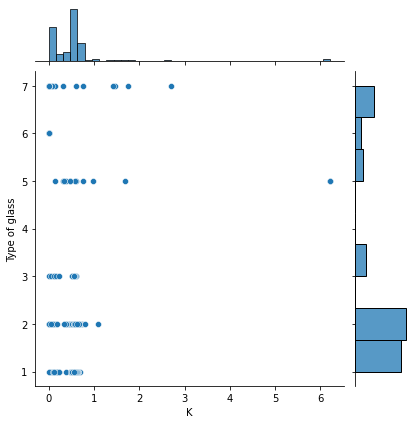

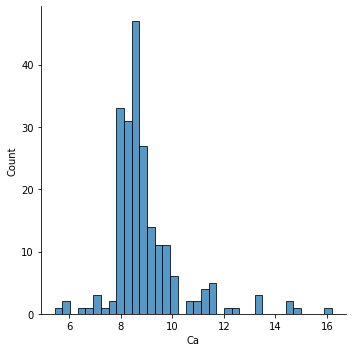

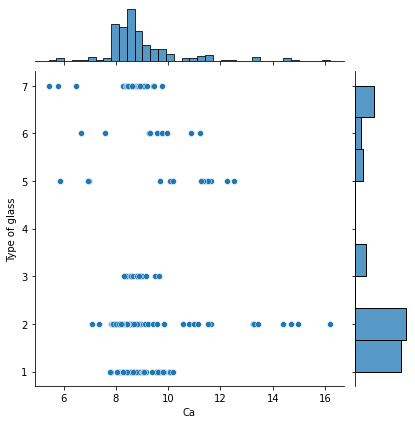

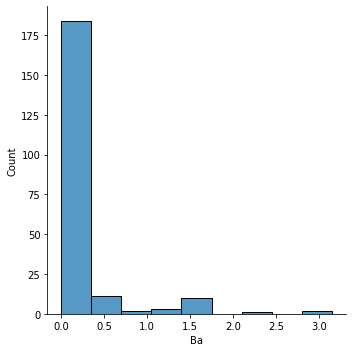

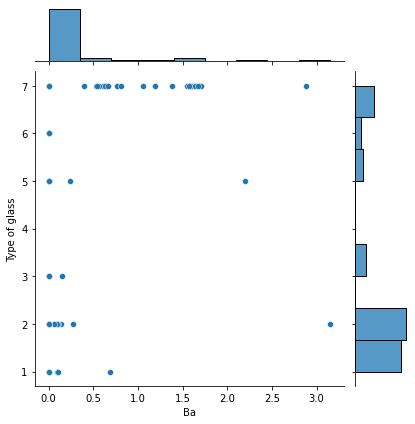

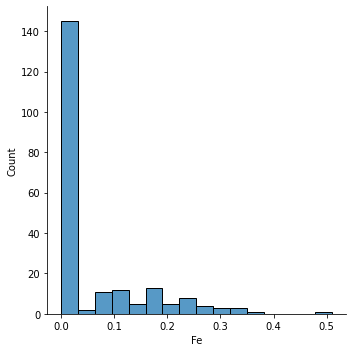

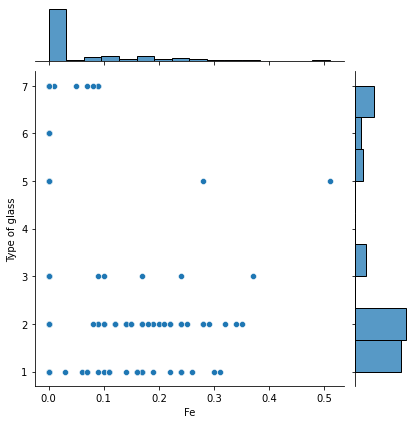

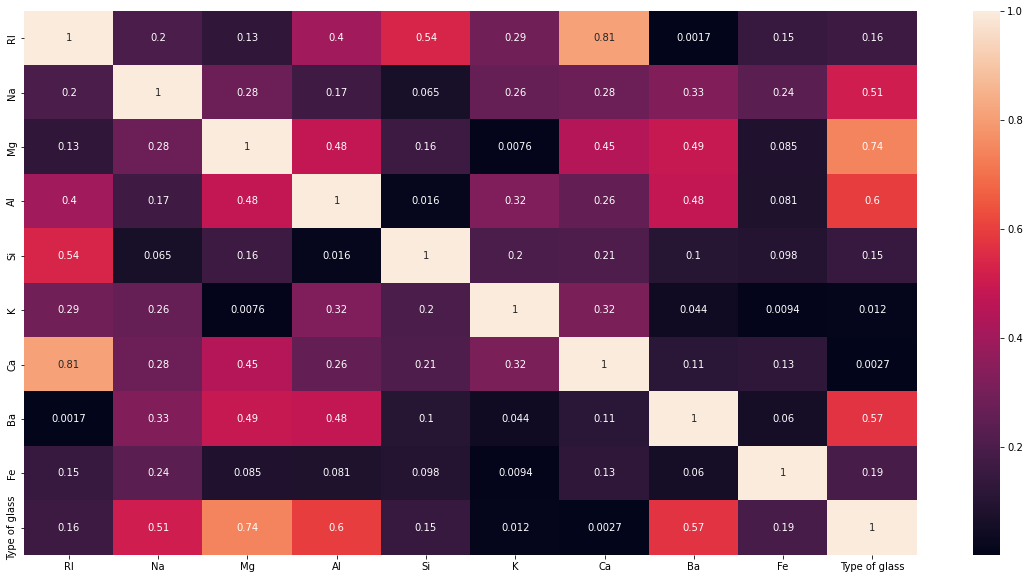

In [38]:
EDA(df_clean,features,'Type of glass')

# **3)decision boundary plotting**

In [39]:
def plot_decision_boundary(data,feature,target,k):
  for i in range(2,len(feature)):
    X=data.iloc[:,[i-2,i]].values
    y=data.loc[:,target].astype(int).values
    knn=KNeighborsClassifier(n_neighbors=k) # knn model for the data
    knn.fit(X, y)
    plt.figure(figsize=(12, 10))
    plot_decision_regions(X, y, clf = knn, legend=2) # it plots the decision boundary
    plt.xlabel(feature[i-2]) #Names the x-axis
    plt.ylabel(feature[i-1]) #Names the y-axis
    plt.title('Knn with K='+ str(k)) #Names the graph
    plt.show()

# **4) Evaluate the KNN algorithm model**

1. **encoding** 


*   after cleaning the data, we should encoding the catagorical data.
*   In this data, catagorical data is not occured, so encoding is not needed
 
     
2. **splitting the data**

*   the data must split into two parts. one is training data.in this model we split as a training data is 75% of whole data.
*   another one is testing data.Remaining 25% data spling for test.

3. **Scaling the data**

*   scaling is mandatory for KNN classifier algorithm

4. **Build the model**

*   Build the model using training data.
*   find the best K value by using n fold hit and trail cross validation.
*   two model is build with two ways based on the distance calculated formulae

1.   eulidean distance formulae 
2.   manhattan distance formulae






5. **Evaluation metric for model** 

*   using accuracy score find the best K value.
*   comparing the true result and predicted result



In [40]:
def KNN_classifier(data,feature,target,k,method):
  X=data.loc[:,feature].values
  y=data.loc[:,target].astype(int).values
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=57)# spliting the data

  scaler=StandardScaler() #scaling the data 
  scaler.fit(X_train) # scaling is  mandatory for Knn classifier
  X_train_scale=scaler.transform(X_train)
  X_test_scale=scaler.transform(X_test)

  knn=KNeighborsClassifier(n_neighbors=k, metric=method) # knn model for the data
  knn.fit(X_train_scale, y_train)
  y_predict=knn.predict(X_test_scale)
  y_pred_proba=knn.predict_proba(X_test_scale)
  #print(confusion_matrix(y_test,y_predict))
  print('for ' ,k ,' value ',"Train Accuracy : ",round(knn.score(X_train_scale,y_train),3),"Val Accuracy : ", round(np.mean(cross_val_score(knn, X_train_scale, y_train, cv=9)),3) , 'using ', method) # test the model and it computes the accuracy (train data accuracy)
  return y_test,y_predict

In [41]:
KNN_classifier(df_clean,features,'Type of glass',2,'euclidean')

for  2  value  Train Accuracy :  0.811 Val Accuracy :  0.653 using  euclidean


(array([7, 2, 2, 5, 2, 3, 2, 7, 2, 2, 2, 7, 2, 1, 7, 7, 1, 2, 7, 7, 1, 2,
        3, 3, 1, 7, 2, 5, 2, 1, 2, 1, 7, 7, 2, 2, 7, 2, 2, 1, 2, 1, 3, 1,
        7, 2, 1, 2, 2, 2, 2, 7, 2, 2]),
 array([7, 1, 2, 5, 2, 1, 1, 7, 2, 1, 2, 7, 1, 1, 7, 7, 1, 2, 7, 7, 1, 2,
        2, 3, 3, 7, 1, 2, 2, 1, 1, 1, 7, 7, 1, 2, 7, 1, 1, 1, 2, 1, 1, 1,
        6, 1, 2, 2, 1, 2, 2, 1, 1, 2]))

In [42]:
for i in range(1,25):
  KNN_classifier(df_clean,features,'Type of glass',i,'euclidean')

for  1  value  Train Accuracy :  1.0 Val Accuracy :  0.692 using  euclidean
for  2  value  Train Accuracy :  0.811 Val Accuracy :  0.653 using  euclidean
for  3  value  Train Accuracy :  0.818 Val Accuracy :  0.666 using  euclidean
for  4  value  Train Accuracy :  0.78 Val Accuracy :  0.666 using  euclidean
for  5  value  Train Accuracy :  0.742 Val Accuracy :  0.666 using  euclidean
for  6  value  Train Accuracy :  0.736 Val Accuracy :  0.672 using  euclidean
for  7  value  Train Accuracy :  0.711 Val Accuracy :  0.666 using  euclidean
for  8  value  Train Accuracy :  0.73 Val Accuracy :  0.672 using  euclidean
for  9  value  Train Accuracy :  0.698 Val Accuracy :  0.652 using  euclidean
for  10  value  Train Accuracy :  0.698 Val Accuracy :  0.633 using  euclidean
for  11  value  Train Accuracy :  0.679 Val Accuracy :  0.646 using  euclidean
for  12  value  Train Accuracy :  0.679 Val Accuracy :  0.64 using  euclidean
for  13  value  Train Accuracy :  0.66 Val Accuracy :  0.639 using

In [43]:
y_test,y_predict_euclidean= KNN_classifier(df_clean,features,'Type of glass',1,'euclidean')

for  1  value  Train Accuracy :  1.0 Val Accuracy :  0.692 using  euclidean


In [44]:
for i in range(1,25):
  KNN_classifier(df_clean,features,'Type of glass',i,'manhattan')

for  1  value  Train Accuracy :  1.0 Val Accuracy :  0.723 using  manhattan
for  2  value  Train Accuracy :  0.843 Val Accuracy :  0.678 using  manhattan
for  3  value  Train Accuracy :  0.843 Val Accuracy :  0.697 using  manhattan
for  4  value  Train Accuracy :  0.805 Val Accuracy :  0.697 using  manhattan
for  5  value  Train Accuracy :  0.761 Val Accuracy :  0.678 using  manhattan
for  6  value  Train Accuracy :  0.742 Val Accuracy :  0.671 using  manhattan
for  7  value  Train Accuracy :  0.742 Val Accuracy :  0.672 using  manhattan
for  8  value  Train Accuracy :  0.73 Val Accuracy :  0.69 using  manhattan
for  9  value  Train Accuracy :  0.717 Val Accuracy :  0.697 using  manhattan
for  10  value  Train Accuracy :  0.723 Val Accuracy :  0.678 using  manhattan
for  11  value  Train Accuracy :  0.723 Val Accuracy :  0.672 using  manhattan
for  12  value  Train Accuracy :  0.711 Val Accuracy :  0.665 using  manhattan
for  13  value  Train Accuracy :  0.717 Val Accuracy :  0.665 usi

In [45]:
y_test,y_predict_manhattan=KNN_classifier(df_clean,features,'Type of glass',1,'manhattan')

for  1  value  Train Accuracy :  1.0 Val Accuracy :  0.723 using  manhattan


In [46]:
df_result= pd.DataFrame({'actual': y_test, 'manhattan': y_predict_manhattan, 'euclid':y_predict_euclidean})
df_result.head(10)

,actual,manhattan,euclid
0,7,7,7
1,2,1,2
2,2,2,2
3,5,5,5
4,2,2,2
5,3,2,2
6,2,1,3
7,7,7,7
8,2,2,2
9,2,1,1


In [47]:
accuracy_score(y_test,y_predict_euclidean)

0.7592592592592593

In [48]:
accuracy_score(y_test,y_predict_manhattan)

0.7592592592592593

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


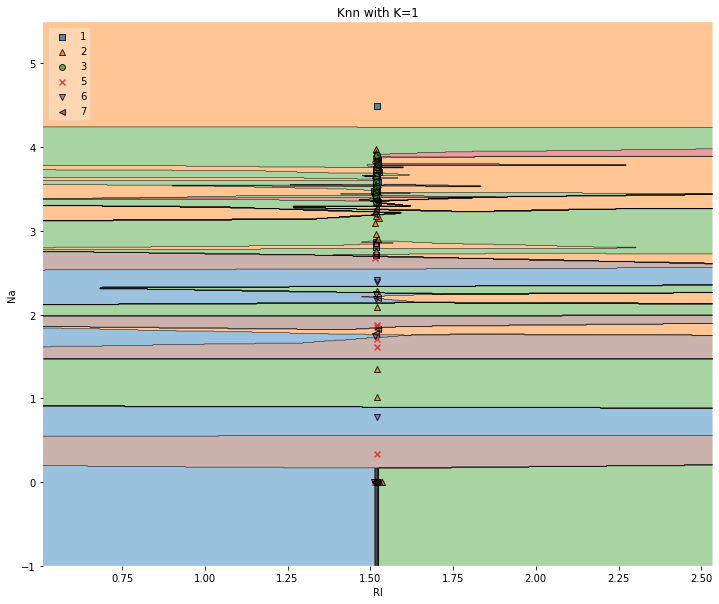

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


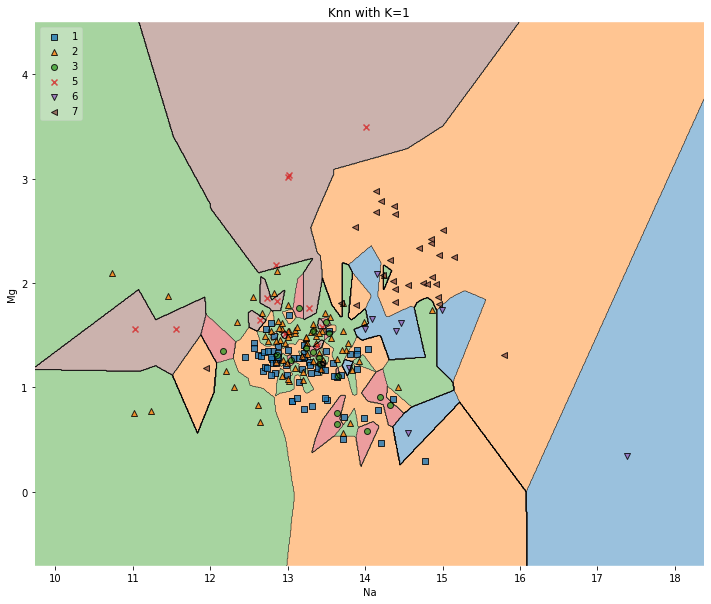

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


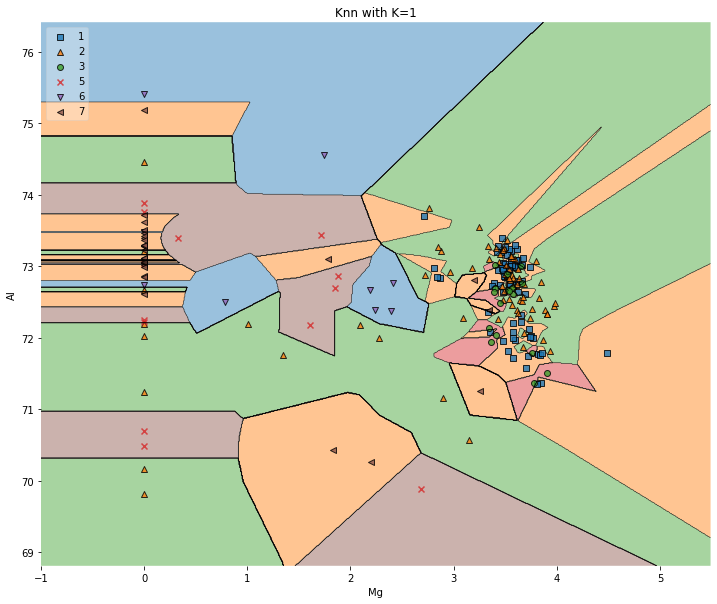

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


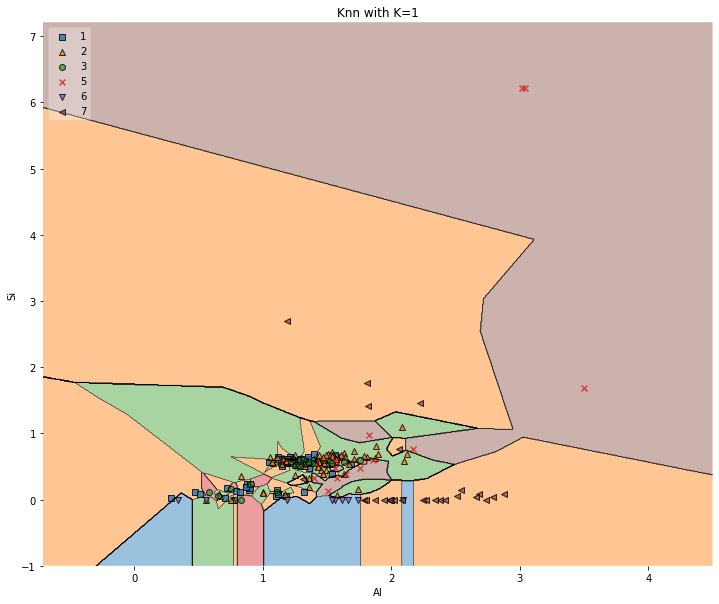

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


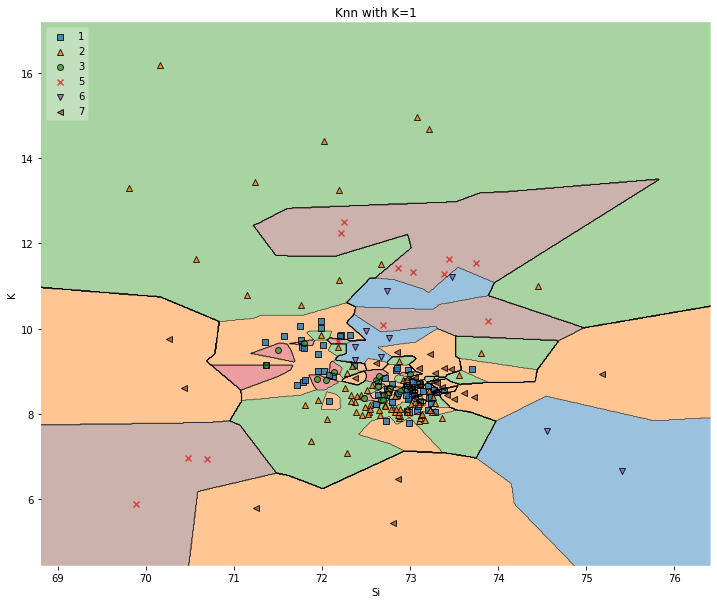

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


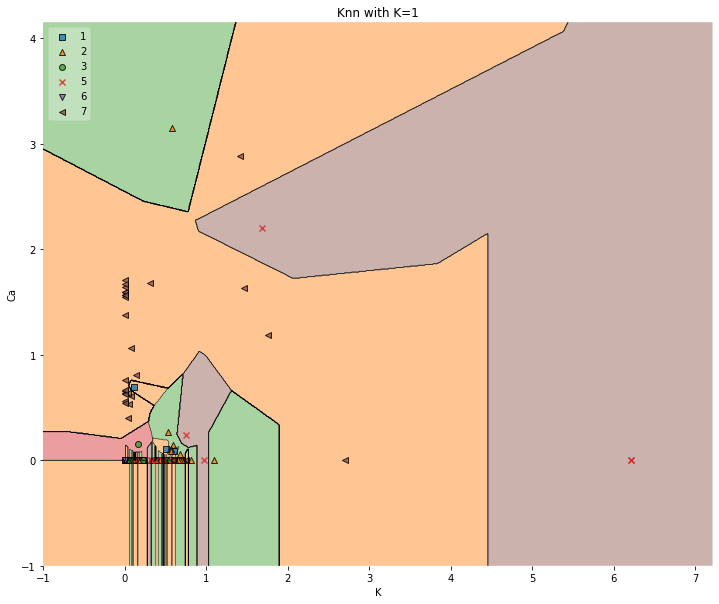

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


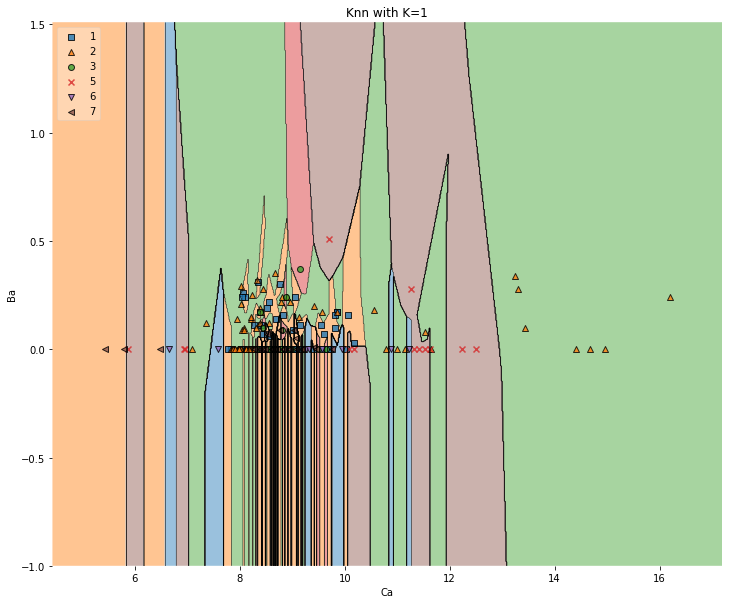

In [49]:
plot_decision_boundary(df_clean,features,'Type of glass',1)

In [51]:
cm_knn=confusion_matrix(y_test,y_predict_euclidean)
cm_knn

array([[ 7,  1,  2,  0,  0],
       [ 5, 18,  2,  0,  0],
       [ 1,  1,  2,  0,  0],
       [ 0,  0,  0,  2,  0],
       [ 1,  0,  0,  0, 12]])

In [52]:
cm_knn=confusion_matrix(y_test,y_predict_manhattan)
cm_knn

array([[ 7,  1,  2,  0,  0],
       [ 6, 18,  1,  0,  0],
       [ 1,  1,  2,  0,  0],
       [ 0,  0,  0,  2,  0],
       [ 1,  0,  0,  0, 12]])

# ***when K=1, cross validation score is high and train accuracy score is also high compared to other K values***


# ***so,best K value is 1 and best method of calculating distance is manhattan***



# ***5)Cross check with error rate***

for  1  value  Train Accuracy :  1.0 Val Accuracy :  0.723 using  manhattan
for  1  value  Train Accuracy :  1.0 Val Accuracy :  0.692 using  euclidean
for  2  value  Train Accuracy :  0.843 Val Accuracy :  0.678 using  manhattan
for  2  value  Train Accuracy :  0.811 Val Accuracy :  0.653 using  euclidean
for  3  value  Train Accuracy :  0.843 Val Accuracy :  0.697 using  manhattan
for  3  value  Train Accuracy :  0.818 Val Accuracy :  0.666 using  euclidean
for  4  value  Train Accuracy :  0.805 Val Accuracy :  0.697 using  manhattan
for  4  value  Train Accuracy :  0.78 Val Accuracy :  0.666 using  euclidean
for  5  value  Train Accuracy :  0.761 Val Accuracy :  0.678 using  manhattan
for  5  value  Train Accuracy :  0.742 Val Accuracy :  0.666 using  euclidean
for  6  value  Train Accuracy :  0.742 Val Accuracy :  0.671 using  manhattan
for  6  value  Train Accuracy :  0.736 Val Accuracy :  0.672 using  euclidean
for  7  value  Train Accuracy :  0.742 Val Accuracy :  0.672 using  m

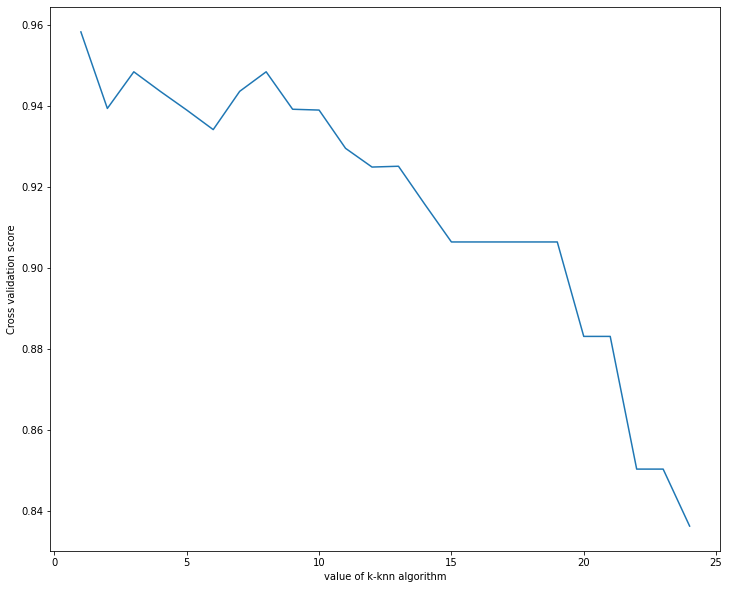

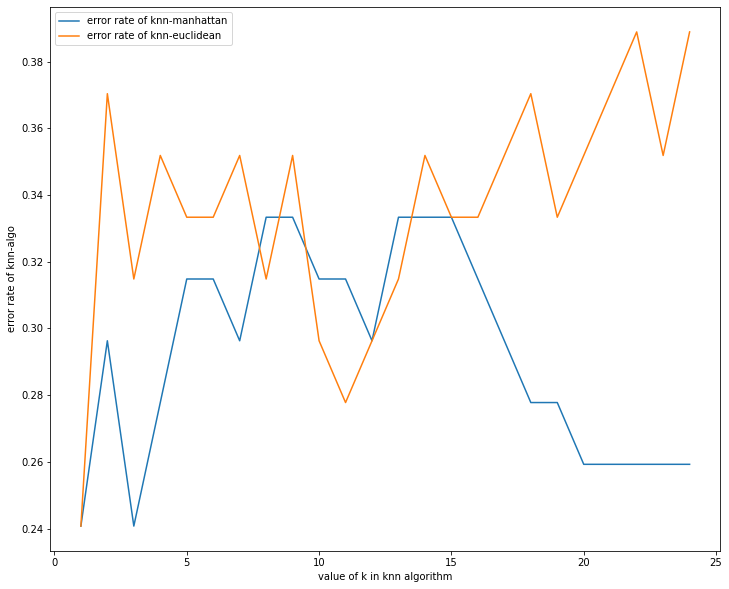

In [53]:
k_range=range(1,25)
k_score=[]
error_rate_euc=[]
error_rate_man=[]
for k in k_range:
  knn=KNeighborsClassifier(n_neighbors=k)
  scores=cross_val_score(knn,df_clean,df_clean['Type of glass'],cv=9,scoring='accuracy')
  k_score.append(scores.mean())

  y_test,y_predict_manhattan=KNN_classifier(df_clean,features,'Type of glass',k,'manhattan')
  y_test,y_predict_euclidean=KNN_classifier(df_clean,features,'Type of glass',k,'euclidean')
  error_rate_man.append(np.mean(y_predict_manhattan!=y_test))
  error_rate_euc.append(np.mean(y_predict_euclidean!=y_test))

plt.figure(figsize=(12,10))
plt.plot(k_range,k_score)
plt.xlabel('value of k-knn algorithm')
plt.ylabel('Cross validation score')
plt.show()

plt.figure(figsize=(12,10))
plt.plot(k_range,error_rate_man,label='error rate of knn-manhattan')
plt.plot(k_range,error_rate_euc,label='error rate of knn-euclidean')
plt.xlabel('value of k in knn algorithm')
plt.ylabel('error rate of knn-algo')
plt.legend()
plt.show()


# ***As per error rate graph, 1-NN algorithm  using manhattan method gives low error rate when compared to using euclidean method.***

# ***to avoid over fitting and underfitting we choose best K as 1. it gives higher accuracy and higher croos validation score***

